# Rohan Allen
# Twitter Sentiment Analysis

# importing the pandas library to hold and manupulate the dataset, numpy library to perform numerical operations, seaborn and matplotlib to visualize the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# reading the tweets dataset from the specified location

In [7]:
data=pd.read_csv("C:/Users/Rohan/Desktop/Python Programs/NLP_Twitter_Sentiment_Analysis-main/twitter.csv")

# viewing the dataset

In [8]:
data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


# viewing basic info abt datasets like columns,number of non-null entries and data types of cols

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [12]:
data.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


# viewing only the tweets from the dataset by specyfying the tweet col

In [13]:
data['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

#  Dropping the id col as it is not req. keeping only the label col, 0 indicates positive, 1 indicates negative and the tweet itself

In [15]:
# axis=1 to indicate dropping the whole column
data=data.drop(['id'], axis=1)

In [17]:
# to verify
data.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


# Lets visualize the dataset for a better understanding

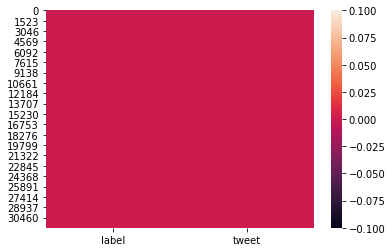

In [30]:
# plotting a heatmap using seaborn to see if any null values present
sns.heatmap(data.isnull())
# no null values as colour is constant with no color break

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002223C28D088>]],
      dtype=object)

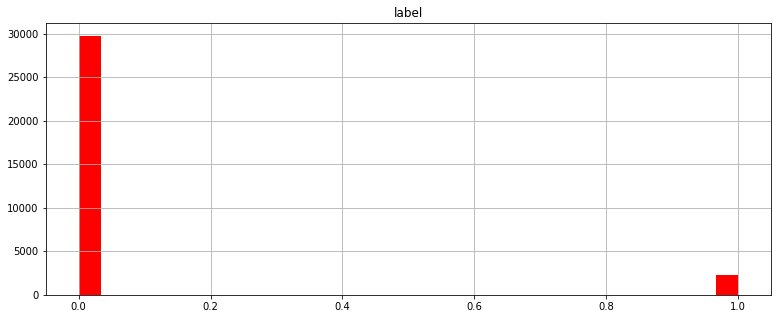

In [26]:
# plotting a histogram to see how many tweets are positive or negative
data.hist(bins = 30, figsize = (13,5), color = 'r')
# as we can see majority of the tweets are positive

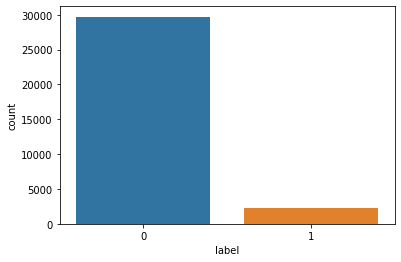

In [28]:
# using a countplot see how many tweets are positive or negative
sns.countplot(data['label'])

Text(0.5, 1.0, 'Tweet label and their frequency ')

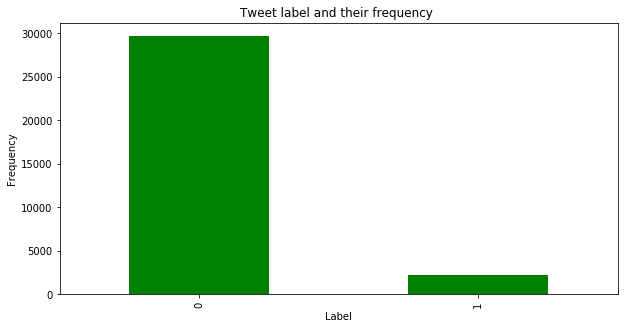

In [32]:
# plotting a bar graph to see how many tweets are positive or negative
data['label'].value_counts().plot(kind='bar',color='green',figsize=(10,5))
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Tweet label and their frequency ')

# add new col to dataset to get length of each tweet

In [33]:
data['length']=data['tweet'].apply(len)
data.head()

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39


# Plot graph of tweet length

Text(0.5, 1.0, 'Tweet length and their frequency ')

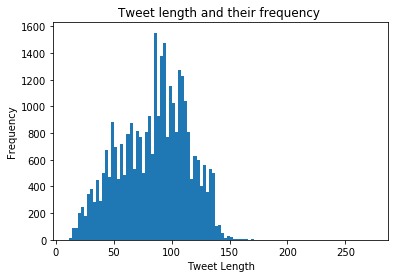

In [39]:
data['length'].plot(kind='hist',bins=100)
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.title('Tweet length and their frequency ')
# on avg most tweets are bw 80 and 100

# view mathematical stats on the length of each tweet

In [42]:
data['length'].describe()

count    31962.000000
mean        84.739628
std         29.455749
min         11.000000
25%         63.000000
50%         88.000000
75%        108.000000
max        274.000000
Name: length, dtype: float64

In [44]:
# viewing shortest tweet
data[data['length']==11]

,label,tweet,length
25195,0,i love you,11


# divide all th +ve and -ve tweets into 2 seperate dataframes

In [46]:
positive=data[data['label']==0]

In [47]:
negative=data[data['label']==1]

In [48]:
# to view
positive

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...,61
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63


In [49]:
negative

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


# to store all the tweets in one list

In [51]:
sentences=data['tweet'].tolist()
sentences

[' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty',
 '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ',
 ' factsguide: society now    #motivation',
 '[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  ',
 ' @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦',
 "the next school year is the year for exams.ð\x9f\x98¯ can't think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl",
 'we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦ ',
 " @user @user welcome here !  i'm   it's so #gr8 ! ",
 ' â\x86\x9d #ireland consume

In [52]:
len(sentences)

31962

In [53]:
# join everything in one string
one_string=" ".join(sentences)

# use wordcloud to visualize all the words in the string. more frequent the words the bigger it is. most used word is user, love,smile,etc. all positive words makes sense as this is an unbalanced dataset with mostly positive tweets. 

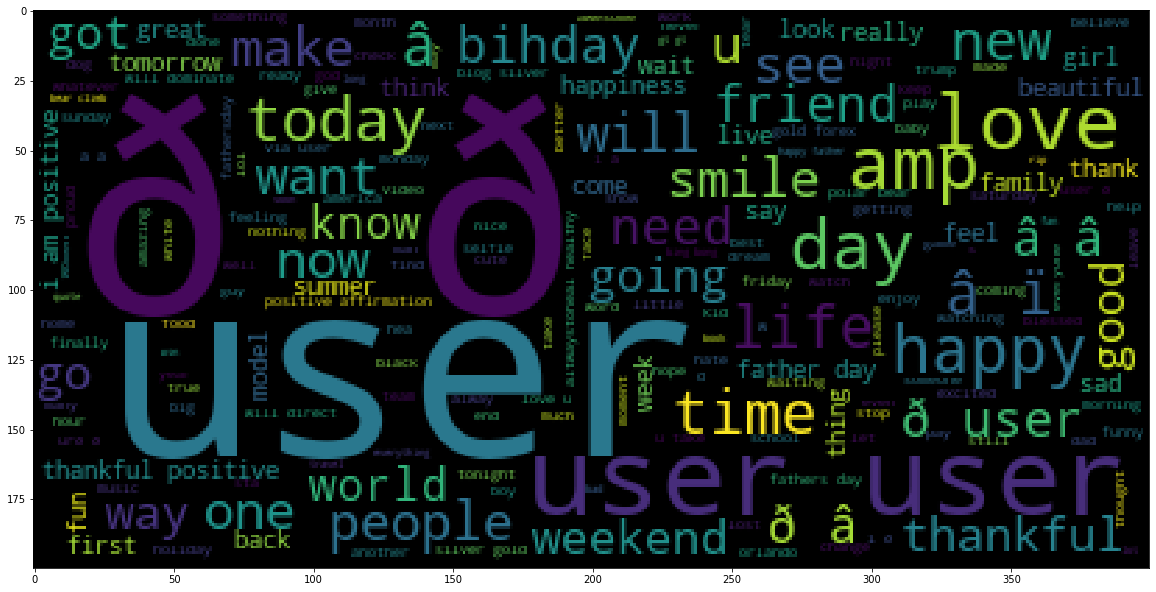

In [54]:

!pip install WordCloud
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(one_string))

# doing the word cloud to visualize only the negative tweets

In [ ]:
neg_sents=negative['tweet'].tolist()
neg_sents


In [57]:
# join everything in one string
neg_string=" ".join(neg_sents)

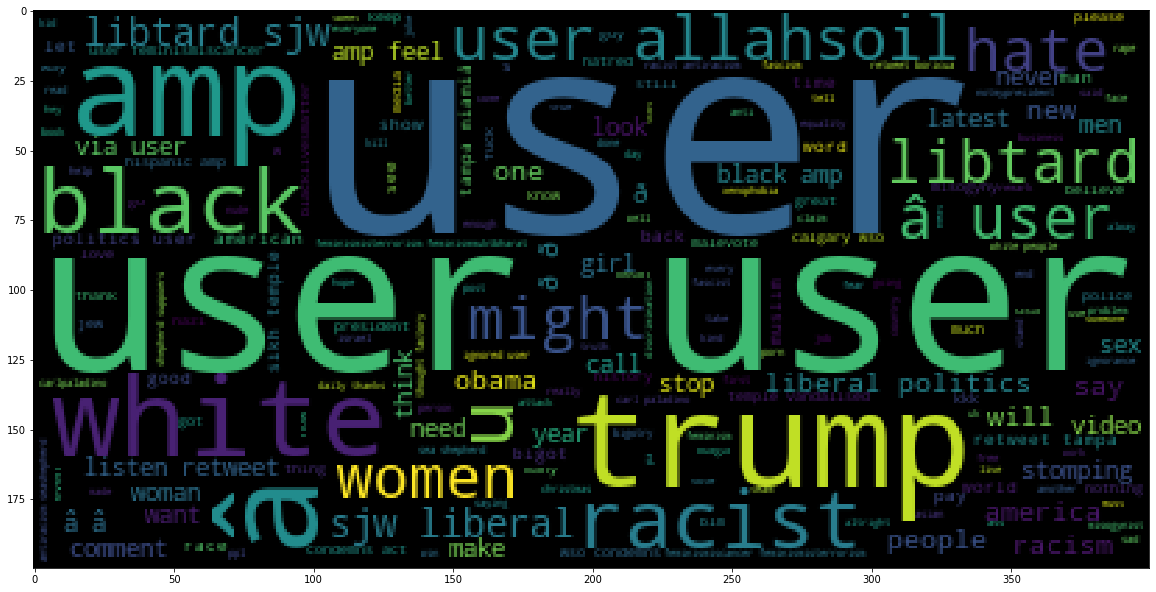

In [58]:
# here we can see more hateful and abusive words
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(neg_string))

# removing punctuations, stopwords and performing count vectorization on test data before proceeding to actual tweets.

In [81]:
import string
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [82]:
Test = 'Good morning beautiful people :)... I am having fun learning Machine learning and AI!!'
test_rem=[char for char in Test if char not in string.punctuation]
test_rem

['G',
 'o',
 'o',
 'd',
 ' ',
 'm',
 'o',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'b',
 'e',
 'a',
 'u',
 't',
 'i',
 'f',
 'u',
 'l',
 ' ',
 'p',
 'e',
 'o',
 'p',
 'l',
 'e',
 ' ',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 'h',
 'a',
 'v',
 'i',
 'n',
 'g',
 ' ',
 'f',
 'u',
 'n',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'M',
 'a',
 'c',
 'h',
 'i',
 'n',
 'e',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'A',
 'I']

In [83]:
test_rem_join=''.join(test_rem)
test_rem_join

'Good morning beautiful people  I am having fun learning Machine learning and AI'

In [84]:
import nltk # natural language toolkit
nltk.download('stopwords')
# to download all the stopwords, words like and, the,etc unimporttant words which do not effect the sentiment of the tweet at all.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rohan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [85]:
# to see all the english stopwords
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [86]:
# remove stopwords from test_rem_join string, split by default on spaces
test_rem_join_clean=[word for word in test_rem_join.split() if word.lower() not in stopwords.words('english') ]
test_rem_join_clean

['Good',
 'morning',
 'beautiful',
 'people',
 'fun',
 'learning',
 'Machine',
 'learning',
 'AI']

In [89]:
# testing on another sample data
mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations!'

In [90]:
mini_challenge_rem=[char for char in mini_challenge if char not in string.punctuation]
mini_challenge_join=''.join(mini_challenge_rem)
mini_challenge_clean=[word for word in mini_challenge_join.split() if word.lower() not in stopwords.words('english') ]
mini_challenge_clean

['mini', 'challenge', 'teach', 'remove', 'stopwords', 'punctuations']

In [91]:
# count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.','This document is the second paper.','And this is the third one.','Is this the first paper?']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)
print(vectorizer.get_feature_names())


['and', 'document', 'first', 'is', 'one', 'paper', 'second', 'the', 'third', 'this']


In [92]:
print(X.toarray())

[[0 0 1 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 1 1 0 1]
 [1 0 0 1 1 0 0 1 1 1]
 [0 0 1 1 0 1 0 1 0 1]]


# count vectorization basically coverts text into numbers. you right the unique list of words in the sample on top and depending on the frequency of the words in each row u put that no. refer to recording.

# cleaning the tweets by removing punctuations, stopwords.

In [59]:
# to see all the punctuations we have to remove
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [60]:
import nltk # natural language toolkit
nltk.download('stopwords')
# to download all the stopwords, words like and, the,etc unimporttant words which do not effect the sentiment of the tweet at all.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rohan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [61]:
# to see all the english stopwords
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [62]:
# cleaning tweets function, remove stopwords, add char if that char is not in string.punctuation similar for stopwords
def tweet_cleaning(tweet):
    punc_removed=[char for char in tweet if char not in string.punctuation]
    punc_removed_join=''.join(punc_removed)
    punc_removed_join_clean=[word for word in punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return punc_removed_join_clean
    
    
    

In [63]:
# calling function and passing all the tweets
data['Cleaned Tweets']=data['tweet'].apply(tweet_cleaning)

In [64]:
data.head()

,label,tweet,length,Cleaned Tweets
0,0,@user when a father is dysfunctional and is s...,102,"[user, father, dysfunctional, selfish, drags, ..."
1,0,@user @user thanks for #lyft credit i can't us...,122,"[user, user, thanks, lyft, credit, cant, use, ..."
2,0,bihday your majesty,21,"[bihday, majesty]"
3,0,#model i love u take with u all the time in ...,86,"[model, love, u, take, u, time, urð±, ðð..."
4,0,factsguide: society now #motivation,39,"[factsguide, society, motivation]"


In [66]:
#comparing cleaned tweets and initial tweets
print(data['Cleaned Tweets'][5])

['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']


In [67]:
print(data['tweet'][5])

[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  


In [69]:
# perform count vectorization and add add analyser as a pre-processing step to clean data again using tweet_cleaning func.
# thus we pass the original tweets again
from sklearn.feature_extraction.text import CountVectorizer
vectorizer= CountVectorizer(analyzer = tweet_cleaning)
tweets_countvectorizer= CountVectorizer(analyzer = tweet_cleaning, dtype='uint8').fit_transform(data['tweet']).toarray()

In [70]:
# count vect matrix has 31962 tweets or rows and 47386 unique words
tweets_countvectorizer.shape

(31962, 47386)

In [71]:
X=tweets_countvectorizer

In [72]:
y=data['label']

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2)

In [74]:
# training the data using naive bayes algorithm
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [75]:
from sklearn.metrics import classification_report, confusion_matrix

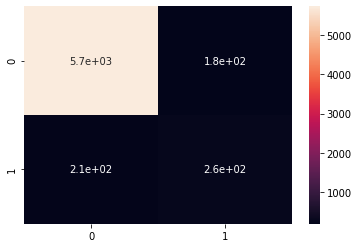

In [76]:
# Predicting the Test set results using our algo and compare with actual label values
# passing x_test values to predict y_test
y_predict_test = NB_classifier.predict(X_test)
# plotting a matrix with y_test(actual results, x-axis) and y_predict_test(ml predicted results, y-axis)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)
# confusion matrix top left indicates 5700 tweets identified as positive correctly
# top right indicates 180 tweets identified as positive incorrectly(false positive, they are actually -ve)
# bottom left indicates 210 tweets identified as negative incorrectly(false negative, they are actually +ve)
# bottom right indicates 260 tweets identified as negative correctly

In [77]:
# dataset is unbalanced with way more positive tweets, therefore accuracy will be biased
# can sample the dataset accordingly to reduce this imbalance and also use better ml algorithms
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5923
           1       0.59      0.56      0.58       470

    accuracy                           0.94      6393
   macro avg       0.78      0.77      0.77      6393
weighted avg       0.94      0.94      0.94      6393

